# Importing libraries and dataset

In [211]:
# Importing all libraries

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource
import plotly.express as px
import plotly.graph_objects as go
import folium
output_notebook()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.stats import norm
from scipy.stats import chi2_contingency, norm

Loading BokehJS ...

In [212]:
# Establishing project path

path = r'/Users/MadrigalPaez/Documents/2 - FORMACIÓN Y TRABAJO/CAREER FOUNDRY/DATA ANALYTICS/2 - Data Immersion/Achievement 6 - Advanced Analytics & Dashboard Design/092025_global_startup_ecosystem_analysis'

In [213]:
path

'/Users/MadrigalPaez/Documents/2 - FORMACIÓN Y TRABAJO/CAREER FOUNDRY/DATA ANALYTICS/2 - Data Immersion/Achievement 6 - Advanced Analytics & Dashboard Design/092025_global_startup_ecosystem_analysis'

In [214]:
# Importing "global_startup_success.csv" dataframe

global_startup_cleaned = pd.read_csv(os.path.join(path, '02_data', 'original_data', 'primary', 'global_startup_success.csv'))

# First exploratory analysis "global_startup_cleaned" dataset

In [215]:
global_startup_cleaned.shape

(5000, 15)

In [216]:
global_startup_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Startup Name              5000 non-null   object 
 1   Founded Year              5000 non-null   int64  
 2   Country                   5000 non-null   object 
 3   Industry                  5000 non-null   object 
 4   Funding Stage             5000 non-null   object 
 5   Total Funding ($M)        5000 non-null   int64  
 6   Number of Employees       5000 non-null   int64  
 7   Annual Revenue ($M)       5000 non-null   int64  
 8   Valuation ($B)            5000 non-null   float64
 9   Success Score             5000 non-null   int64  
 10  Acquired?                 5000 non-null   object 
 11  IPO?                      5000 non-null   object 
 12  Customer Base (Millions)  5000 non-null   int64  
 13  Tech Stack                5000 non-null   object 
 14  Social M

In [217]:
global_startup_cleaned.head(5)

Startup Name  Founded Year Country    Industry Funding Stage  \
0    Startup_1          2009  Canada  Healthcare      Series A   
1    Startup_2          2004      UK  Healthcare           IPO   
2    Startup_3          2018     USA  Healthcare          Seed   
3    Startup_4          2014  France        Tech          Seed   
4    Startup_5          2006   Japan      Energy      Series C   

   Total Funding ($M)  Number of Employees  Annual Revenue ($M)  \
0                 269                 3047                  104   
1                  40                  630                  431   
2                 399                 2475                  375   
3                 404                 1011                  907   
4                 419                 3917                  280   

   Valuation ($B)  Success Score Acquired? IPO?  Customer Base (Millions)  \
0           46.11              5        No   No                        43   
1           33.04              1        No  Yes                        64   
2           15.79              8        No   No                        74   
3           17.12              7       Yes  Yes                        26   
4            4.39              6       Yes  Yes                        30   

       Tech Stack  Social Media Followers  
0    Java, Spring                 4158814  
1  Node.js, React                 4063014  
2    PHP, Laravel                 3449855  
3      Python, AI                  630421  
4  Node.js, React                  365956

In [218]:
global_startup_cleaned.describe()

Founded Year  Total Funding ($M)  Number of Employees  \
count   5000.000000         5000.000000          5000.000000   
mean    2010.960400          251.409400          2484.582800   
std        6.628123          143.924874          1451.626957   
min     2000.000000            1.000000             5.000000   
25%     2005.000000          125.750000          1233.750000   
50%     2011.000000          255.000000          2493.000000   
75%     2017.000000          376.000000          3730.500000   
max     2022.000000          499.000000          4998.000000   

       Annual Revenue ($M)  Valuation ($B)  Success Score  \
count          5000.000000     5000.000000    5000.000000   
mean            495.721600       25.237284       4.965000   
std             290.071494       14.509278       2.574316   
min               1.000000        0.110000       1.000000   
25%             240.750000       12.845000       3.000000   
50%             496.000000       25.460000       5.000000   
75%             746.000000       37.650000       7.000000   
max             999.000000       49.980000       9.000000   

       Customer Base (Millions)  Social Media Followers  
count               5000.000000            5.000000e+03  
mean                  49.302800            2.560720e+06  
std                   28.364894            1.430807e+06  
min                    1.000000            1.005000e+03  
25%                   25.000000            1.353902e+06  
50%                   49.000000            2.618292e+06  
75%                   74.000000            3.802054e+06  
max                   99.000000            4.999860e+06

In [219]:
global_startup_cleaned.describe(include='object')

Startup Name  Country Industry Funding Stage Acquired?  IPO?  \
count           5000     5000     5000          5000      5000  5000   
unique          5000       10       10             5         2     2   
top     Startup_5000  Germany     Tech           IPO       Yes    No   
freq               1      539      524          1037      2533  2605   

          Tech Stack  
count           5000  
unique             5  
top     Java, Spring  
freq            1051

# Cleaning and wrangling "global_startup_cleaned" dataset

In [220]:
# Checking duplicates

duplicates_count_global_startup_cleaned = global_startup_cleaned.duplicated().sum()

In [221]:
duplicates_count_global_startup_cleaned

np.int64(0)

In [222]:
# Checking duplicates in "Startup Name" column

duplicate_names = global_startup_cleaned[global_startup_cleaned.duplicated(subset=['Startup Name'], keep=False)]
duplicate_names.sort_values(by='Startup Name').head(10)

Empty DataFrame
Columns: [Startup Name, Founded Year, Country, Industry, Funding Stage, Total Funding ($M), Number of Employees, Annual Revenue ($M), Valuation ($B), Success Score, Acquired?, IPO?, Customer Base (Millions), Tech Stack, Social Media Followers]
Index: []

In [223]:
# Checking missing values

global_startup_cleaned.isnull().sum().sort_values(ascending=False)

Startup Name                0
Founded Year                0
Country                     0
Industry                    0
Funding Stage               0
Total Funding ($M)          0
Number of Employees         0
Annual Revenue ($M)         0
Valuation ($B)              0
Success Score               0
Acquired?                   0
IPO?                        0
Customer Base (Millions)    0
Tech Stack                  0
Social Media Followers      0
dtype: int64

In [224]:
# Checking dtypes

global_startup_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Startup Name              5000 non-null   object 
 1   Founded Year              5000 non-null   int64  
 2   Country                   5000 non-null   object 
 3   Industry                  5000 non-null   object 
 4   Funding Stage             5000 non-null   object 
 5   Total Funding ($M)        5000 non-null   int64  
 6   Number of Employees       5000 non-null   int64  
 7   Annual Revenue ($M)       5000 non-null   int64  
 8   Valuation ($B)            5000 non-null   float64
 9   Success Score             5000 non-null   int64  
 10  Acquired?                 5000 non-null   object 
 11  IPO?                      5000 non-null   object 
 12  Customer Base (Millions)  5000 non-null   int64  
 13  Tech Stack                5000 non-null   object 
 14  Social M

In [225]:
# Changing "Founded Year" type to datetime

global_startup_cleaned['Founded Year'] = pd.to_datetime(global_startup_cleaned['Founded Year'], format='%Y')

In [226]:
# Changing object types to category

dtype_categorical = ['Country', 'Industry', 'Funding Stage', 'Acquired?', 'IPO?', 'Tech Stack']
for col in dtype_categorical: global_startup_cleaned[col] = global_startup_cleaned[col].astype('category')

In [227]:
# Changing int types to float

dtype_float = ['Total Funding ($M)', 'Number of Employees', 'Annual Revenue ($M)', 'Valuation ($B)', 'Success Score', 'Customer Base (Millions)', 'Social Media Followers']
for col in dtype_float: global_startup_cleaned[col] = global_startup_cleaned[col].astype('float')

In [228]:
global_startup_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Startup Name              5000 non-null   object        
 1   Founded Year              5000 non-null   datetime64[ns]
 2   Country                   5000 non-null   category      
 3   Industry                  5000 non-null   category      
 4   Funding Stage             5000 non-null   category      
 5   Total Funding ($M)        5000 non-null   float64       
 6   Number of Employees       5000 non-null   float64       
 7   Annual Revenue ($M)       5000 non-null   float64       
 8   Valuation ($B)            5000 non-null   float64       
 9   Success Score             5000 non-null   float64       
 10  Acquired?                 5000 non-null   category      
 11  IPO?                      5000 non-null   category      
 12  Customer Base (Milli

In [229]:
# Normalizing column names

global_startup_cleaned.rename(columns={'Startup Name': 'startup_name', 'Founded Year': 'founded_year', 'Country': 'country', 'Industry': 'industry', 'Funding Stage': 'funding_stage', 'Total Funding ($M)': 'total_funding_millions', 'Number of Employees': 'number_employees', 'Annual Revenue ($M)': 'annual_revenue_millions', 'Valuation ($B)': 'valuation_billions', 'Success Score': 'success_score', 'Acquired?': 'acquired', 'IPO?': 'ipo', 'Customer Base (Millions)': 'customers_millions', 'Tech Stack': 'tech_stack', 'Social Media Followers': 'social_media_followers'}, inplace=True)

In [230]:
global_startup_cleaned.head(5)

startup_name founded_year country    industry funding_stage  \
0    Startup_1   2009-01-01  Canada  Healthcare      Series A   
1    Startup_2   2004-01-01      UK  Healthcare           IPO   
2    Startup_3   2018-01-01     USA  Healthcare          Seed   
3    Startup_4   2014-01-01  France        Tech          Seed   
4    Startup_5   2006-01-01   Japan      Energy      Series C   

   total_funding_millions  number_employees  annual_revenue_millions  \
0                   269.0            3047.0                    104.0   
1                    40.0             630.0                    431.0   
2                   399.0            2475.0                    375.0   
3                   404.0            1011.0                    907.0   
4                   419.0            3917.0                    280.0   

   valuation_billions  success_score acquired  ipo  customers_millions  \
0               46.11            5.0       No   No                43.0   
1               33.04            1.0       No  Yes                64.0   
2               15.79            8.0       No   No                74.0   
3               17.12            7.0      Yes  Yes                26.0   
4                4.39            6.0      Yes  Yes                30.0   

       tech_stack  social_media_followers  
0    Java, Spring               4158814.0  
1  Node.js, React               4063014.0  
2    PHP, Laravel               3449855.0  
3      Python, AI                630421.0  
4  Node.js, React                365956.0

In [231]:
# Converting Yes/No to binary for "ipo" and "acquired" columns

global_startup_cleaned['ipo'] = global_startup_cleaned['ipo'].map({'Yes': 1, 'No': 0})
global_startup_cleaned['acquired'] = global_startup_cleaned['acquired'].map({'Yes': 1, 'No': 0})

In [232]:
global_startup_cleaned[['ipo', 'acquired']].head()

ipo acquired
0   0        0
1   1        0
2   0        0
3   1        1
4   1        1

In [233]:
global_startup_cleaned.describe(include='category')

country industry funding_stage  acquired   ipo    tech_stack
count      5000     5000          5000      5000  5000          5000
unique       10       10             5         2     2             5
top     Germany     Tech           IPO         1     0  Java, Spring
freq        539      524          1037      2533  2605          1051

In [234]:
# Unique values in "country"

unique_country = global_startup_cleaned['country'].unique()

In [235]:
unique_country

['Canada', 'UK', 'USA', 'France', 'Japan', 'China', 'Australia', 'Brazil', 'India', 'Germany']
Categories (10, object): ['Australia', 'Brazil', 'Canada', 'China', ..., 'India', 'Japan', 'UK', 'USA']

In [236]:
# Unique values in "industry"

unique_industry = global_startup_cleaned['industry'].unique()

In [237]:
unique_industry

['Healthcare', 'Tech', 'Energy', 'FinTech', 'Gaming', 'EdTech', 'AI', 'E-commerce', 'FoodTech', 'Logistics']
Categories (10, object): ['AI', 'E-commerce', 'EdTech', 'Energy', ..., 'Gaming', 'Healthcare', 'Logistics', 'Tech']

In [238]:
# Unique values in "funding_stage"

unique_funding_stage = global_startup_cleaned['funding_stage'].unique()

In [239]:
unique_funding_stage

['Series A', 'IPO', 'Seed', 'Series C', 'Series B']
Categories (5, object): ['IPO', 'Seed', 'Series A', 'Series B', 'Series C']

In [240]:
# Unique values in "tech_stack"

unique_tech_stack = global_startup_cleaned['tech_stack'].unique()

In [241]:
unique_tech_stack

['Java, Spring', 'Node.js, React', 'PHP, Laravel', 'Python, AI', 'C++, ML']
Categories (5, object): ['C++, ML', 'Java, Spring', 'Node.js, React', 'PHP, Laravel', 'Python, AI']

In [242]:
# Unique values in "founded_year"

unique_founded_year = sorted(global_startup_cleaned['founded_year'].unique())

In [243]:
unique_founded_year

[Timestamp('2000-01-01 00:00:00'),
 Timestamp('2001-01-01 00:00:00'),
 Timestamp('2002-01-01 00:00:00'),
 Timestamp('2003-01-01 00:00:00'),
 Timestamp('2004-01-01 00:00:00'),
 Timestamp('2005-01-01 00:00:00'),
 Timestamp('2006-01-01 00:00:00'),
 Timestamp('2007-01-01 00:00:00'),
 Timestamp('2008-01-01 00:00:00'),
 Timestamp('2009-01-01 00:00:00'),
 Timestamp('2010-01-01 00:00:00'),
 Timestamp('2011-01-01 00:00:00'),
 Timestamp('2012-01-01 00:00:00'),
 Timestamp('2013-01-01 00:00:00'),
 Timestamp('2014-01-01 00:00:00'),
 Timestamp('2015-01-01 00:00:00'),
 Timestamp('2016-01-01 00:00:00'),
 Timestamp('2017-01-01 00:00:00'),
 Timestamp('2018-01-01 00:00:00'),
 Timestamp('2019-01-01 00:00:00'),
 Timestamp('2020-01-01 00:00:00'),
 Timestamp('2021-01-01 00:00:00'),
 Timestamp('2022-01-01 00:00:00')]

In [244]:
# Exporting "global_startup_cleaned" dataset

global_startup_cleaned.to_pickle(os.path.join(path, '02_data','prepared_data', 'global_startup_cleaned.pkl'))

# First visualizations of "global_startup_cleaned" dataset

In [245]:
# Creating dataframes for grouping the data

# Creating dataframe for Total Startups by Country
total_startups_by_country = (global_startup_cleaned.groupby("country", observed=False).size().reset_index(name="total_startups"))

# Creating dataframe for Total Startups Acquired by Country
total_startups_acquired_by_country = (global_startup_cleaned[global_startup_cleaned["acquired"] == 1].groupby("country", observed=False).size().reset_index(name="total_acquired"))

# Creating dataframe for Total Startups that have gone public by Country
total_startups_ipo_by_country = (global_startup_cleaned[global_startup_cleaned["ipo"] == 1].groupby("country", observed=False).size().reset_index(name="total_ipo"))

# Creating dataframe for Total Funding by Country
total_funding_by_country = (global_startup_cleaned.groupby("country", as_index=False, observed=False)["total_funding_millions"].sum().rename(columns={"total_funding_millions": "total_funding_millions"}))

# Creating dataframe for Avg Success Score by Country
avg_success_score_by_country = (global_startup_cleaned.groupby("country", as_index=False, observed=False)["success_score"].mean().rename(columns={"success_score": "avg_success_score"}))

# Creating dataframe for Avg Annual Revenue by Country
avg_revenue_by_country = (global_startup_cleaned.groupby("country", as_index=False, observed=False)["annual_revenue_millions"].mean().rename(columns={"annual_revenue_millions": "avg_annual_revenue"}))

# Creating dataframe for Avg Valuation by Country
avg_valuation_by_country = (global_startup_cleaned.groupby("country", as_index=False, observed=False)["valuation_billions"].mean().rename(columns={"valuation_billions": "avg_valuation"}))

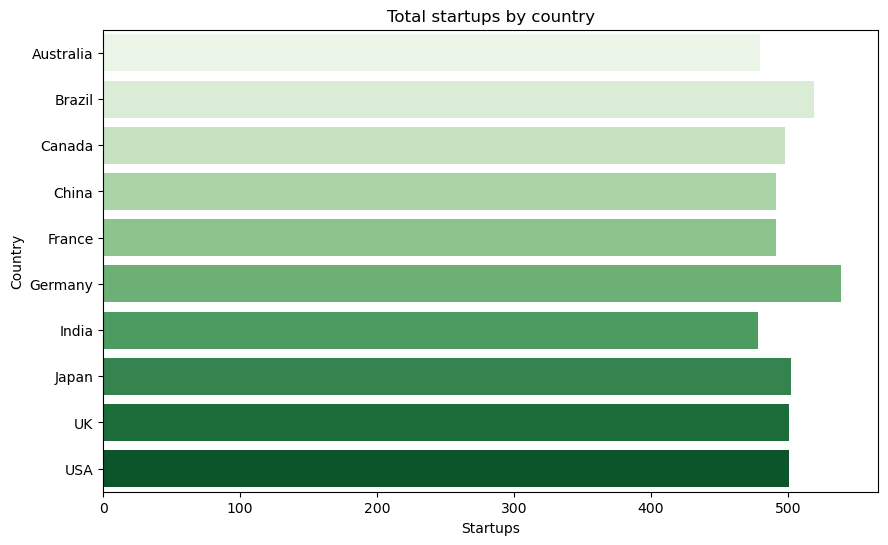

In [246]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=total_startups_by_country.sort_values("total_startups", ascending=False),
    x="total_startups", y="country",
    hue="country", dodge=False,
    palette="Greens", legend=False
)
plt.title("Total startups by country")
plt.xlabel("Startups")
plt.ylabel("Country")
plt.show()

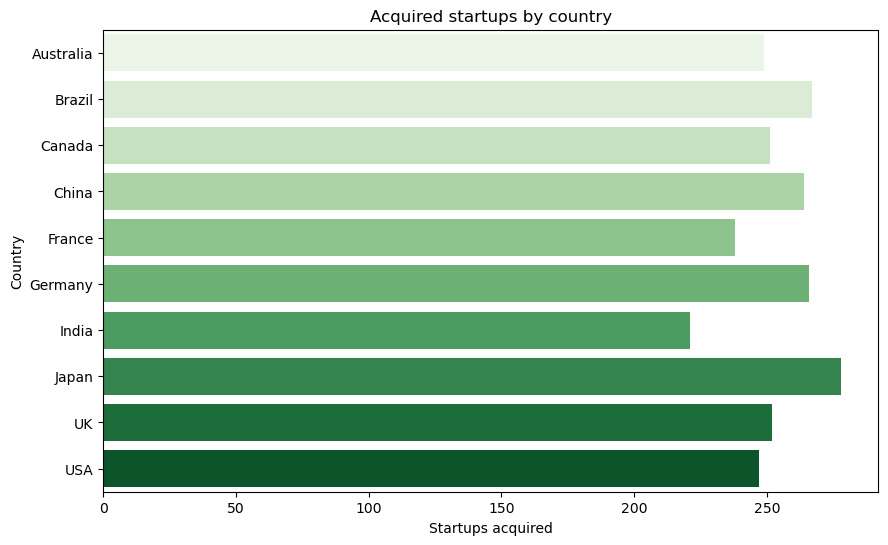

In [247]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=total_startups_acquired_by_country.sort_values("total_acquired", ascending=False),
    x="total_acquired", y="country",
    hue="country", dodge=False,
    palette="Greens", legend=False
)
plt.title("Acquired startups by country")
plt.xlabel("Startups acquired")
plt.ylabel("Country")
plt.show()

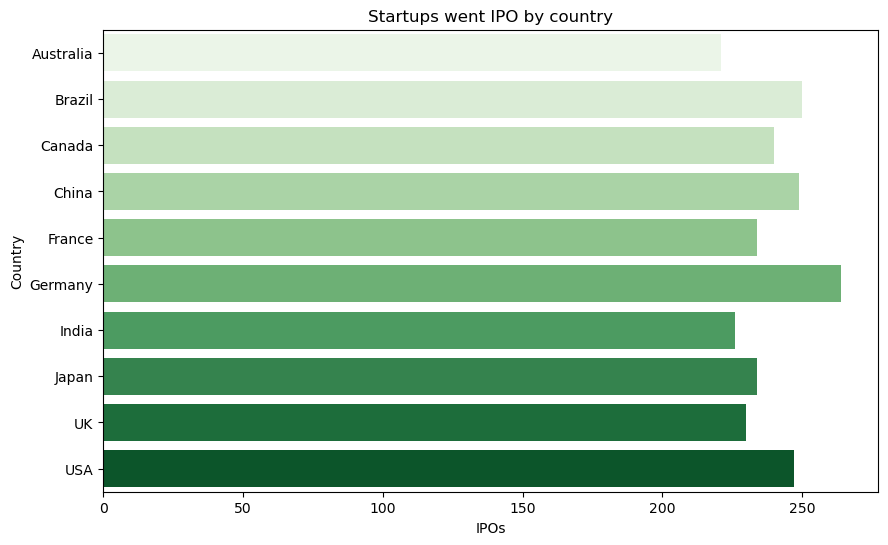

In [248]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=total_startups_ipo_by_country.sort_values("total_ipo", ascending=False),
    x="total_ipo", y="country",
    hue="country", dodge=False,
    palette="Greens", legend=False
)
plt.title("Startups went IPO by country")
plt.xlabel("IPOs")
plt.ylabel("Country")
plt.show()

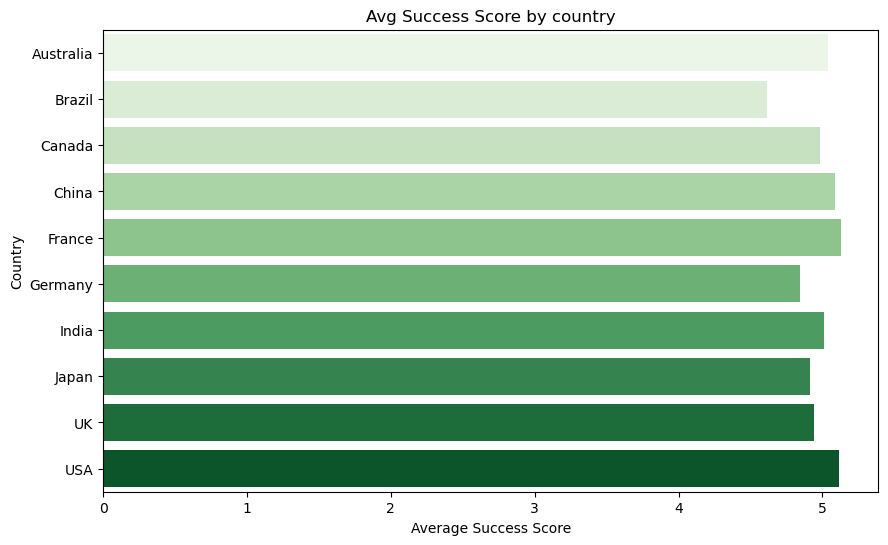

In [249]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=avg_success_score_by_country.sort_values("avg_success_score", ascending=False),
    x="avg_success_score", y="country",
    hue="country", dodge=False,
    palette="Greens", legend=False
)
plt.title("Avg Success Score by country")
plt.xlabel("Average Success Score")
plt.ylabel("Country")
plt.show()

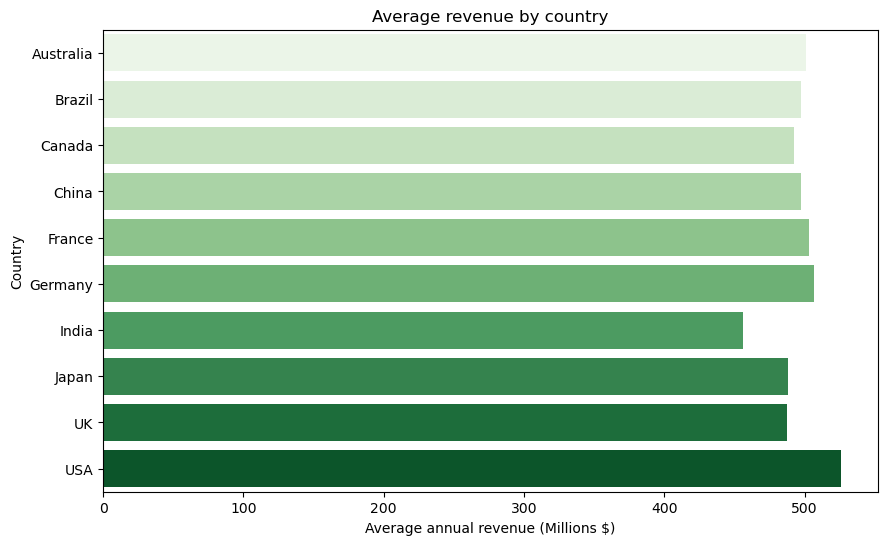

In [250]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=avg_revenue_by_country.sort_values("avg_annual_revenue", ascending=False),
    x="avg_annual_revenue", y="country",
    hue="country", dodge=False,
    palette="Greens", legend=False
)
plt.title("Average revenue by country")
plt.xlabel("Average annual revenue (Millions $)")
plt.ylabel("Country")
plt.show()

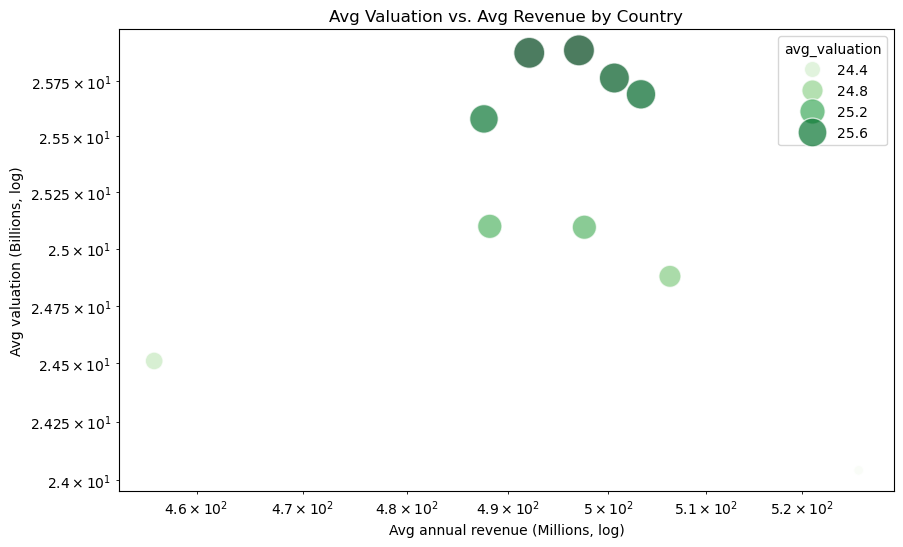

In [251]:
merged_val_rev = avg_valuation_by_country.merge(avg_revenue_by_country, on="country")

plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_val_rev, 
                x="avg_annual_revenue", 
                y="avg_valuation", 
                hue="avg_valuation", 
                palette="Greens", 
                size="avg_valuation", 
                sizes=(50,500),
                alpha=0.7)
plt.xscale("log")
plt.yscale("log")
plt.title("Avg Valuation vs. Avg Revenue by Country")
plt.xlabel("Avg annual revenue (Millions, log)")
plt.ylabel("Avg valuation (Billions, log)")
plt.show()

In [252]:
# Geo analysis using choropleth graphs

# Path to "world-countries.json" from Kaggle, and function for choropleth maps

geojson_file = "/Users/MadrigalPaez/Documents/2 - FORMACIÓN Y TRABAJO/CAREER FOUNDRY/DATA ANALYTICS/2 - Data Immersion/Achievement 6 - Advanced Analytics & Dashboard Design/Advanced Analytics & Dashboard Design - Task 6.3/world-countries.json"

def create_choropleth(df, value_col, legend_name, fill_color):
    m = folium.Map(location=[20, 0], zoom_start=1)
    
    folium.Choropleth(
        geo_data=geojson_file,
        name="choropleth",
        data=df,
        columns=["country", value_col],
        key_on="feature.properties.name",
        fill_color=fill_color,
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name=legend_name,
        nan_fill_color="white"
    ).add_to(m)
    
    return m

In [253]:
# Total Startups by Country

map_total_startups = create_choropleth(
    total_startups_by_country, 
    "total_startups", 
    "Total startups", 
    "Greens")
display(map_total_startups)

In [254]:
# Total Startups that have gone public (IPO) by Country

map_total_ipo = create_choropleth(
    total_startups_ipo_by_country, 
    "total_ipo", 
    "Total startups went IPO", 
    "Greens")
display(map_total_ipo)

In [255]:
# Total Funding by Country

map_total_funding = create_choropleth(
    total_funding_by_country, 
    "total_funding_millions", 
    "Total funding (Millions, $)", 
    "Greens")
display(map_total_funding)

In [256]:
# Average Success Score by Country

map_avg_success = create_choropleth(
    avg_success_score_by_country, 
    "avg_success_score", 
    "Avg Success Score", 
    "Greens")
display(map_avg_success)

In [257]:
# Average Annual Revenue by Country

map_avg_revenue = create_choropleth(
    avg_revenue_by_country, 
    "avg_annual_revenue", 
    "Average annual revenue (Millions, $)", 
    "Greens")
display(map_avg_revenue)

In [258]:
# Average Valuation by Country

map_avg_valuation = create_choropleth(
    avg_valuation_by_country, 
    "avg_valuation", 
    "Average Valuation (Billions)", 
    "Greens")
display(map_avg_valuation)

# Grouping data and creating new categories

In [259]:
# Creating new groups/columns

In [260]:
global_startup_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   startup_name             5000 non-null   object        
 1   founded_year             5000 non-null   datetime64[ns]
 2   country                  5000 non-null   category      
 3   industry                 5000 non-null   category      
 4   funding_stage            5000 non-null   category      
 5   total_funding_millions   5000 non-null   float64       
 6   number_employees         5000 non-null   float64       
 7   annual_revenue_millions  5000 non-null   float64       
 8   valuation_billions       5000 non-null   float64       
 9   success_score            5000 non-null   float64       
 10  acquired                 5000 non-null   category      
 11  ipo                      5000 non-null   category      
 12  customers_millions       5000 non-

In [261]:
global_startup_cleaned.describe()

founded_year  total_funding_millions  number_employees  \
count                        5000             5000.000000       5000.000000   
mean   2010-12-17 15:51:33.120000              251.409400       2484.582800   
min           2000-01-01 00:00:00                1.000000          5.000000   
25%           2005-01-01 00:00:00              125.750000       1233.750000   
50%           2011-01-01 00:00:00              255.000000       2493.000000   
75%           2017-01-01 00:00:00              376.000000       3730.500000   
max           2022-01-01 00:00:00              499.000000       4998.000000   
std                           NaN              143.924874       1451.626957   

       annual_revenue_millions  valuation_billions  success_score  \
count              5000.000000         5000.000000    5000.000000   
mean                495.721600           25.237284       4.965000   
min                   1.000000            0.110000       1.000000   
25%                 240.750000           12.845000       3.000000   
50%                 496.000000           25.460000       5.000000   
75%                 746.000000           37.650000       7.000000   
max                 999.000000           49.980000       9.000000   
std                 290.071494           14.509278       2.574316   

       customers_millions  social_media_followers  
count         5000.000000            5.000000e+03  
mean            49.302800            2.560720e+06  
min              1.000000            1.005000e+03  
25%             25.000000            1.353902e+06  
50%             49.000000            2.618292e+06  
75%             74.000000            3.802054e+06  
max             99.000000            4.999860e+06  
std             28.364894            1.430807e+06

In [262]:
# Grouping by continent

country_to_continent = {
    'Canada': 'North America',
    'USA': 'North America',
    'UK': 'Europe',
    'France': 'Europe',
    'Germany': 'Europe',
    'Japan': 'Asia',
    'China': 'Asia',
    'India': 'Asia',
    'Australia': 'Oceania',
    'Brazil': 'South America'
}

global_startup_cleaned['continent'] = global_startup_cleaned['country'].map(country_to_continent)

In [263]:
# Grouping by industry category

industry_group = {
    'Healthcare': 'Health',
    'Tech': 'Tech',
    'AI': 'Tech',
    'FinTech': 'Finance/Commerce',
    'E-commerce': 'Finance/Commerce',
    'EdTech': 'Tech',
    'Gaming': 'Entertainment',
    'FoodTech': 'Health',
    'Energy': 'Energy',
    'Logistics': 'Finance/Commerce'
}

global_startup_cleaned['industry_group'] = global_startup_cleaned['industry'].map(industry_group)

In [264]:
# Grouping by funding stage

funding_map = {
    'Pre-Seed': 'Early Stage',
    'Seed': 'Early Stage',
    'Angel': 'Early Stage',
    'Series A': 'Growth Stage',
    'Series B': 'Growth Stage',
    'Series C': 'Growth Stage',
    'Series D': 'Late Stage',
    'IPO': 'Late Stage',
    'M&A': 'Late Stage'
}
global_startup_cleaned['funding_stage_group'] = global_startup_cleaned['funding_stage'].map(funding_map)

In [265]:
# Grouping by number of employees (percentiles 25%=1233, 50%=2493, 75%=3730)

bins_employees = [0, 1233, 2493, float('inf')]
labels_employees = ['Small', 'Medium', 'Large']
global_startup_cleaned['size_employees'] = pd.cut(global_startup_cleaned['number_employees'],
                                                  bins=bins_employees, labels=labels_employees, right=True)

In [266]:
# Grouping by revenue (percentiles 25%=240.75, 50%=496, 75%=746)

bins_revenue = [0, 240.75, 496, float('inf')]
labels_revenue = ['Low', 'Medium', 'High']
global_startup_cleaned['size_revenue'] = pd.cut(global_startup_cleaned['annual_revenue_millions'],
                                                bins=bins_revenue, labels=labels_revenue, right=True)

In [267]:
# Grouping by funding investment (percentiles 25%=125.75, 50%=255, 75%=376)

bins_funding = [0, 125.75, 255, float('inf')]
labels_funding = ['Low', 'Medium', 'High']
global_startup_cleaned['size_funding'] = pd.cut(global_startup_cleaned['total_funding_millions'],
                                                bins=bins_funding, labels=labels_funding, right=True)

In [268]:
# Grouping by valuation (percentiles 25%=12.845, 50%=25.46, 75%=37.65)

bins_valuation = [0, 12.845, 25.46, float('inf')]
labels_valuation = ['Low', 'Medium', 'High']
global_startup_cleaned['size_valuation'] = pd.cut(global_startup_cleaned['valuation_billions'],
                                                  bins=bins_valuation, labels=labels_valuation, right=True)

In [269]:
# Creating new ratios/columns to classify the startups for further analysis

# Revenue per employee
global_startup_cleaned["revenue_per_employee"] = (
    global_startup_cleaned["annual_revenue_millions"] / (global_startup_cleaned["number_employees"] + 1)
)
global_startup_cleaned["funding_per_employee"] = (
    global_startup_cleaned["total_funding_millions"] / (global_startup_cleaned["number_employees"] + 1)
)
global_startup_cleaned["valuation_per_employee"] = (
    (global_startup_cleaned["valuation_billions"] * 1000) / (global_startup_cleaned["number_employees"] + 1)
)  

# Revenue per customer
global_startup_cleaned["revenue_per_customer"] = (
    global_startup_cleaned["annual_revenue_millions"] / (global_startup_cleaned["customers_millions"] + 1)
)
global_startup_cleaned["funding_per_customer"] = (
    global_startup_cleaned["total_funding_millions"] / (global_startup_cleaned["customers_millions"] + 1)
)
global_startup_cleaned["valuation_per_customer"] = (
    (global_startup_cleaned["valuation_billions"] * 1000) / (global_startup_cleaned["customers_millions"] + 1)
)

# Funding to revenue
global_startup_cleaned["funding_to_revenue"] = (
    global_startup_cleaned["total_funding_millions"] / (global_startup_cleaned["annual_revenue_millions"] + 1)
)
global_startup_cleaned["valuation_to_revenue"] = (
    (global_startup_cleaned["valuation_billions"] * 1000) / (global_startup_cleaned["annual_revenue_millions"] + 1)
)
global_startup_cleaned["revenue_to_funding"] = (
    global_startup_cleaned["annual_revenue_millions"] / (global_startup_cleaned["total_funding_millions"] + 1)
)

# Social media followers per customer
global_startup_cleaned["followers_per_customer"] = (
    global_startup_cleaned["social_media_followers"] / (global_startup_cleaned["customers_millions"] + 1)
)

In [270]:
global_startup_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   startup_name             5000 non-null   object        
 1   founded_year             5000 non-null   datetime64[ns]
 2   country                  5000 non-null   category      
 3   industry                 5000 non-null   category      
 4   funding_stage            5000 non-null   category      
 5   total_funding_millions   5000 non-null   float64       
 6   number_employees         5000 non-null   float64       
 7   annual_revenue_millions  5000 non-null   float64       
 8   valuation_billions       5000 non-null   float64       
 9   success_score            5000 non-null   float64       
 10  acquired                 5000 non-null   category      
 11  ipo                      5000 non-null   category      
 12  customers_millions       5000 non-

# Checking "global_startup_cleaned" data correlations

In [271]:
# Creating new dataframe including all suitable numerical columns for correlation checking

numerical_columns_global_startup_dataframe = global_startup_cleaned[
    [
        'total_funding_millions',
        'number_employees',
        'annual_revenue_millions',
        'valuation_billions',
        'success_score',
        'customers_millions',
        'social_media_followers',
        'revenue_per_employee',
        'funding_per_employee',
        'valuation_per_employee',
        'revenue_per_customer',
        'funding_per_customer',
        'valuation_per_customer',
        'funding_to_revenue',
        'valuation_to_revenue',
        'revenue_to_funding',
        'followers_per_customer'
    ]
]

In [272]:
correlation_global_startup = numerical_columns_global_startup_dataframe.corr()

In [273]:
correlation_global_startup

total_funding_millions  number_employees  \
total_funding_millions                 1.000000          0.002285   
number_employees                       0.002285          1.000000   
annual_revenue_millions                0.008993          0.010594   
valuation_billions                    -0.014328         -0.000296   
success_score                          0.011716         -0.013319   
customers_millions                     0.007392         -0.005308   
social_media_followers                 0.001015         -0.000710   
revenue_per_employee                  -0.008302         -0.233353   
funding_per_employee                   0.111467         -0.248650   
valuation_per_employee                -0.010243         -0.207544   
revenue_per_customer                  -0.009533          0.009150   
funding_per_customer                   0.306434          0.003329   
valuation_per_customer                -0.002378          0.005826   
funding_to_revenue                     0.121515          0.030103   
valuation_to_revenue                   0.022772          0.015304   
revenue_to_funding                    -0.318496          0.010109   
followers_per_customer                -0.014292          0.014196   

                         annual_revenue_millions  valuation_billions  \
total_funding_millions                  0.008993           -0.014328   
number_employees                        0.010594           -0.000296   
annual_revenue_millions                 1.000000           -0.010944   
valuation_billions                     -0.010944            1.000000   
success_score                          -0.004188            0.009130   
customers_millions                      0.012389            0.001300   
social_media_followers                 -0.018128            0.013219   
revenue_per_employee                    0.086953            0.017797   
funding_per_employee                   -0.011629            0.017590   
valuation_per_employee                 -0.011479            0.107488   
revenue_per_customer                    0.303626            0.002285   
funding_per_customer                   -0.009714           -0.001364   
valuation_per_customer                  0.001147            0.303371   
funding_to_revenue                     -0.231292           -0.003942   
valuation_to_revenue                   -0.252980            0.123972   
revenue_to_funding                      0.160205            0.022926   
followers_per_customer                 -0.001619            0.007378   

                         success_score  customers_millions  \
total_funding_millions        0.011716            0.007392   
number_employees             -0.013319           -0.005308   
annual_revenue_millions      -0.004188            0.012389   
valuation_billions            0.009130            0.001300   
success_score                 1.000000           -0.020083   
customers_millions           -0.020083            1.000000   
social_media_followers        0.014993           -0.009310   
revenue_per_employee         -0.004397            0.021807   
funding_per_employee          0.003515            0.013860   
valuation_per_employee       -0.005047            0.019295   
revenue_per_customer          0.021805           -0.483478   
funding_per_customer          0.026201           -0.497035   
valuation_per_customer        0.027217           -0.491635   
funding_to_revenue           -0.006872           -0.032517   
valuation_to_revenue         -0.013410           -0.014445   
revenue_to_funding           -0.013256            0.001138   
followers_per_customer        0.021516           -0.512788   

                         social_media_followers  revenue_per_employee  \
total_funding_millions                 0.001015             -0.008302   
number_employees                      -0.000710             -0.233353   
annual_revenue_millions               -0.018128              0.086953   
valuation_billions                     0.013219              0.017797   
suc

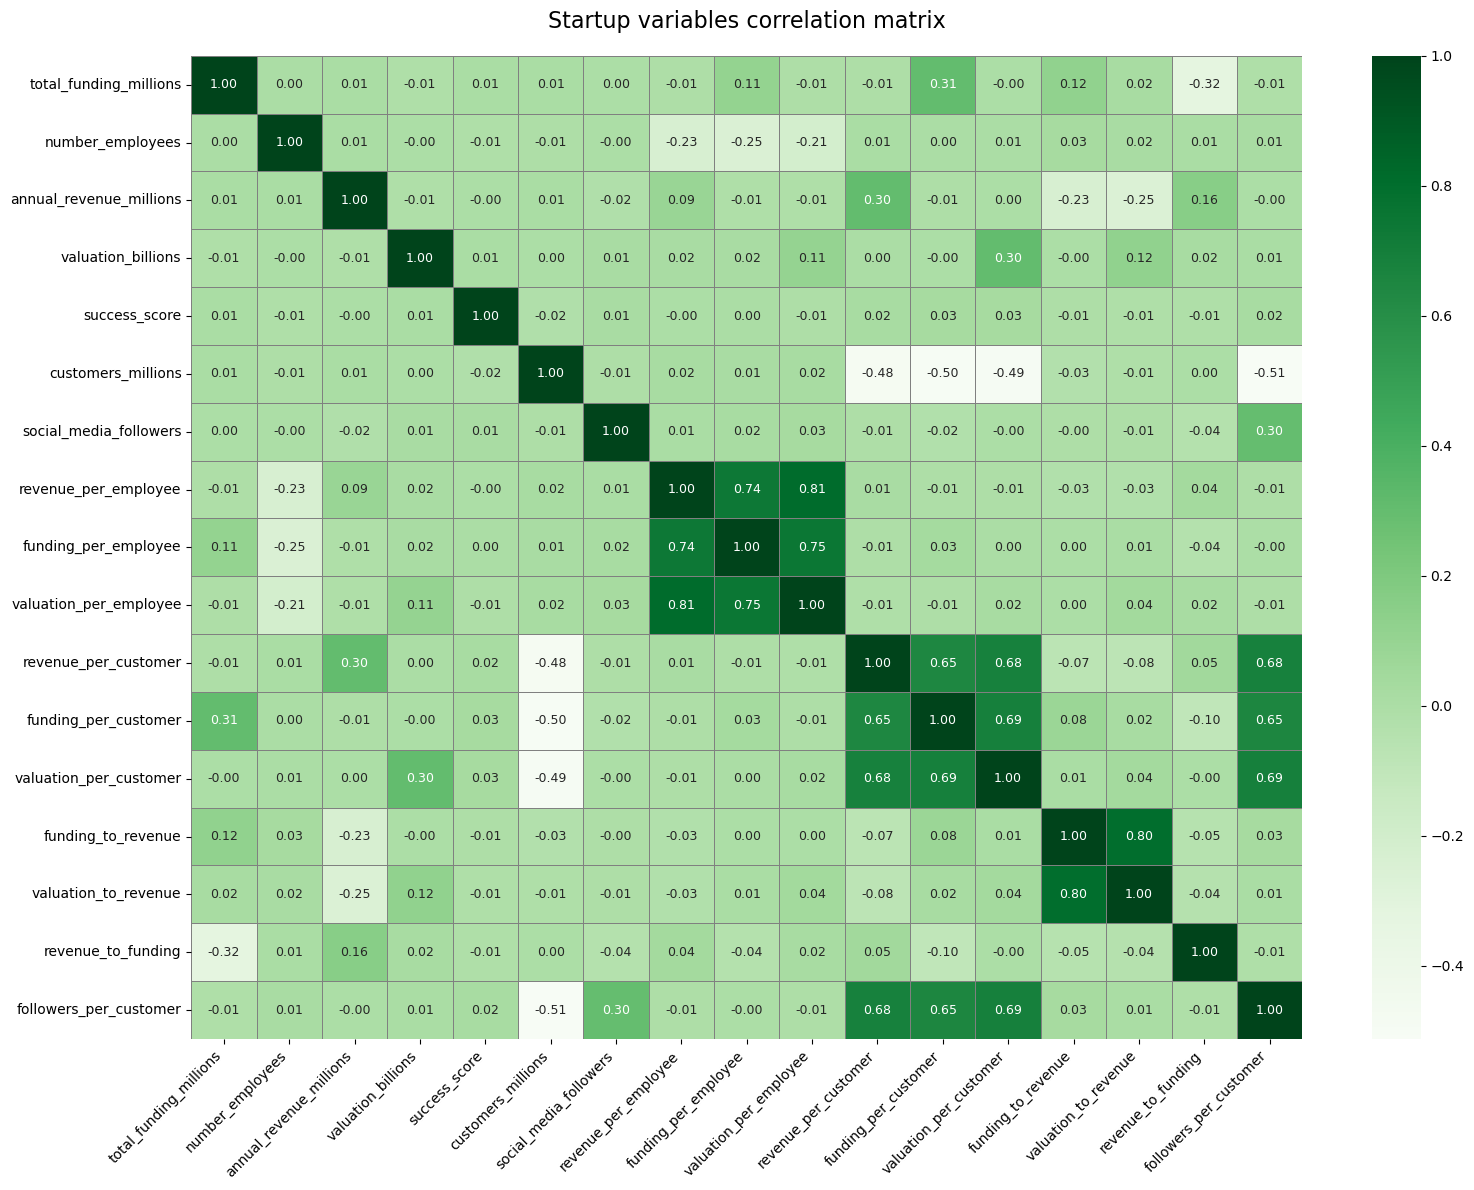

In [274]:
# Numerical variables heatmap visualization

correlation_global_startup = numerical_columns_global_startup_dataframe.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(
    correlation_global_startup,
    annot=True,
    fmt=".2f",         
    cmap="Greens",
    cbar=True,
    square=False,       
    linewidths=0.5,     
    linecolor='gray',
    annot_kws={"size": 9}  
)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title("Startup variables correlation matrix", fontsize=16, pad=20)

plt.tight_layout()  
plt.show()

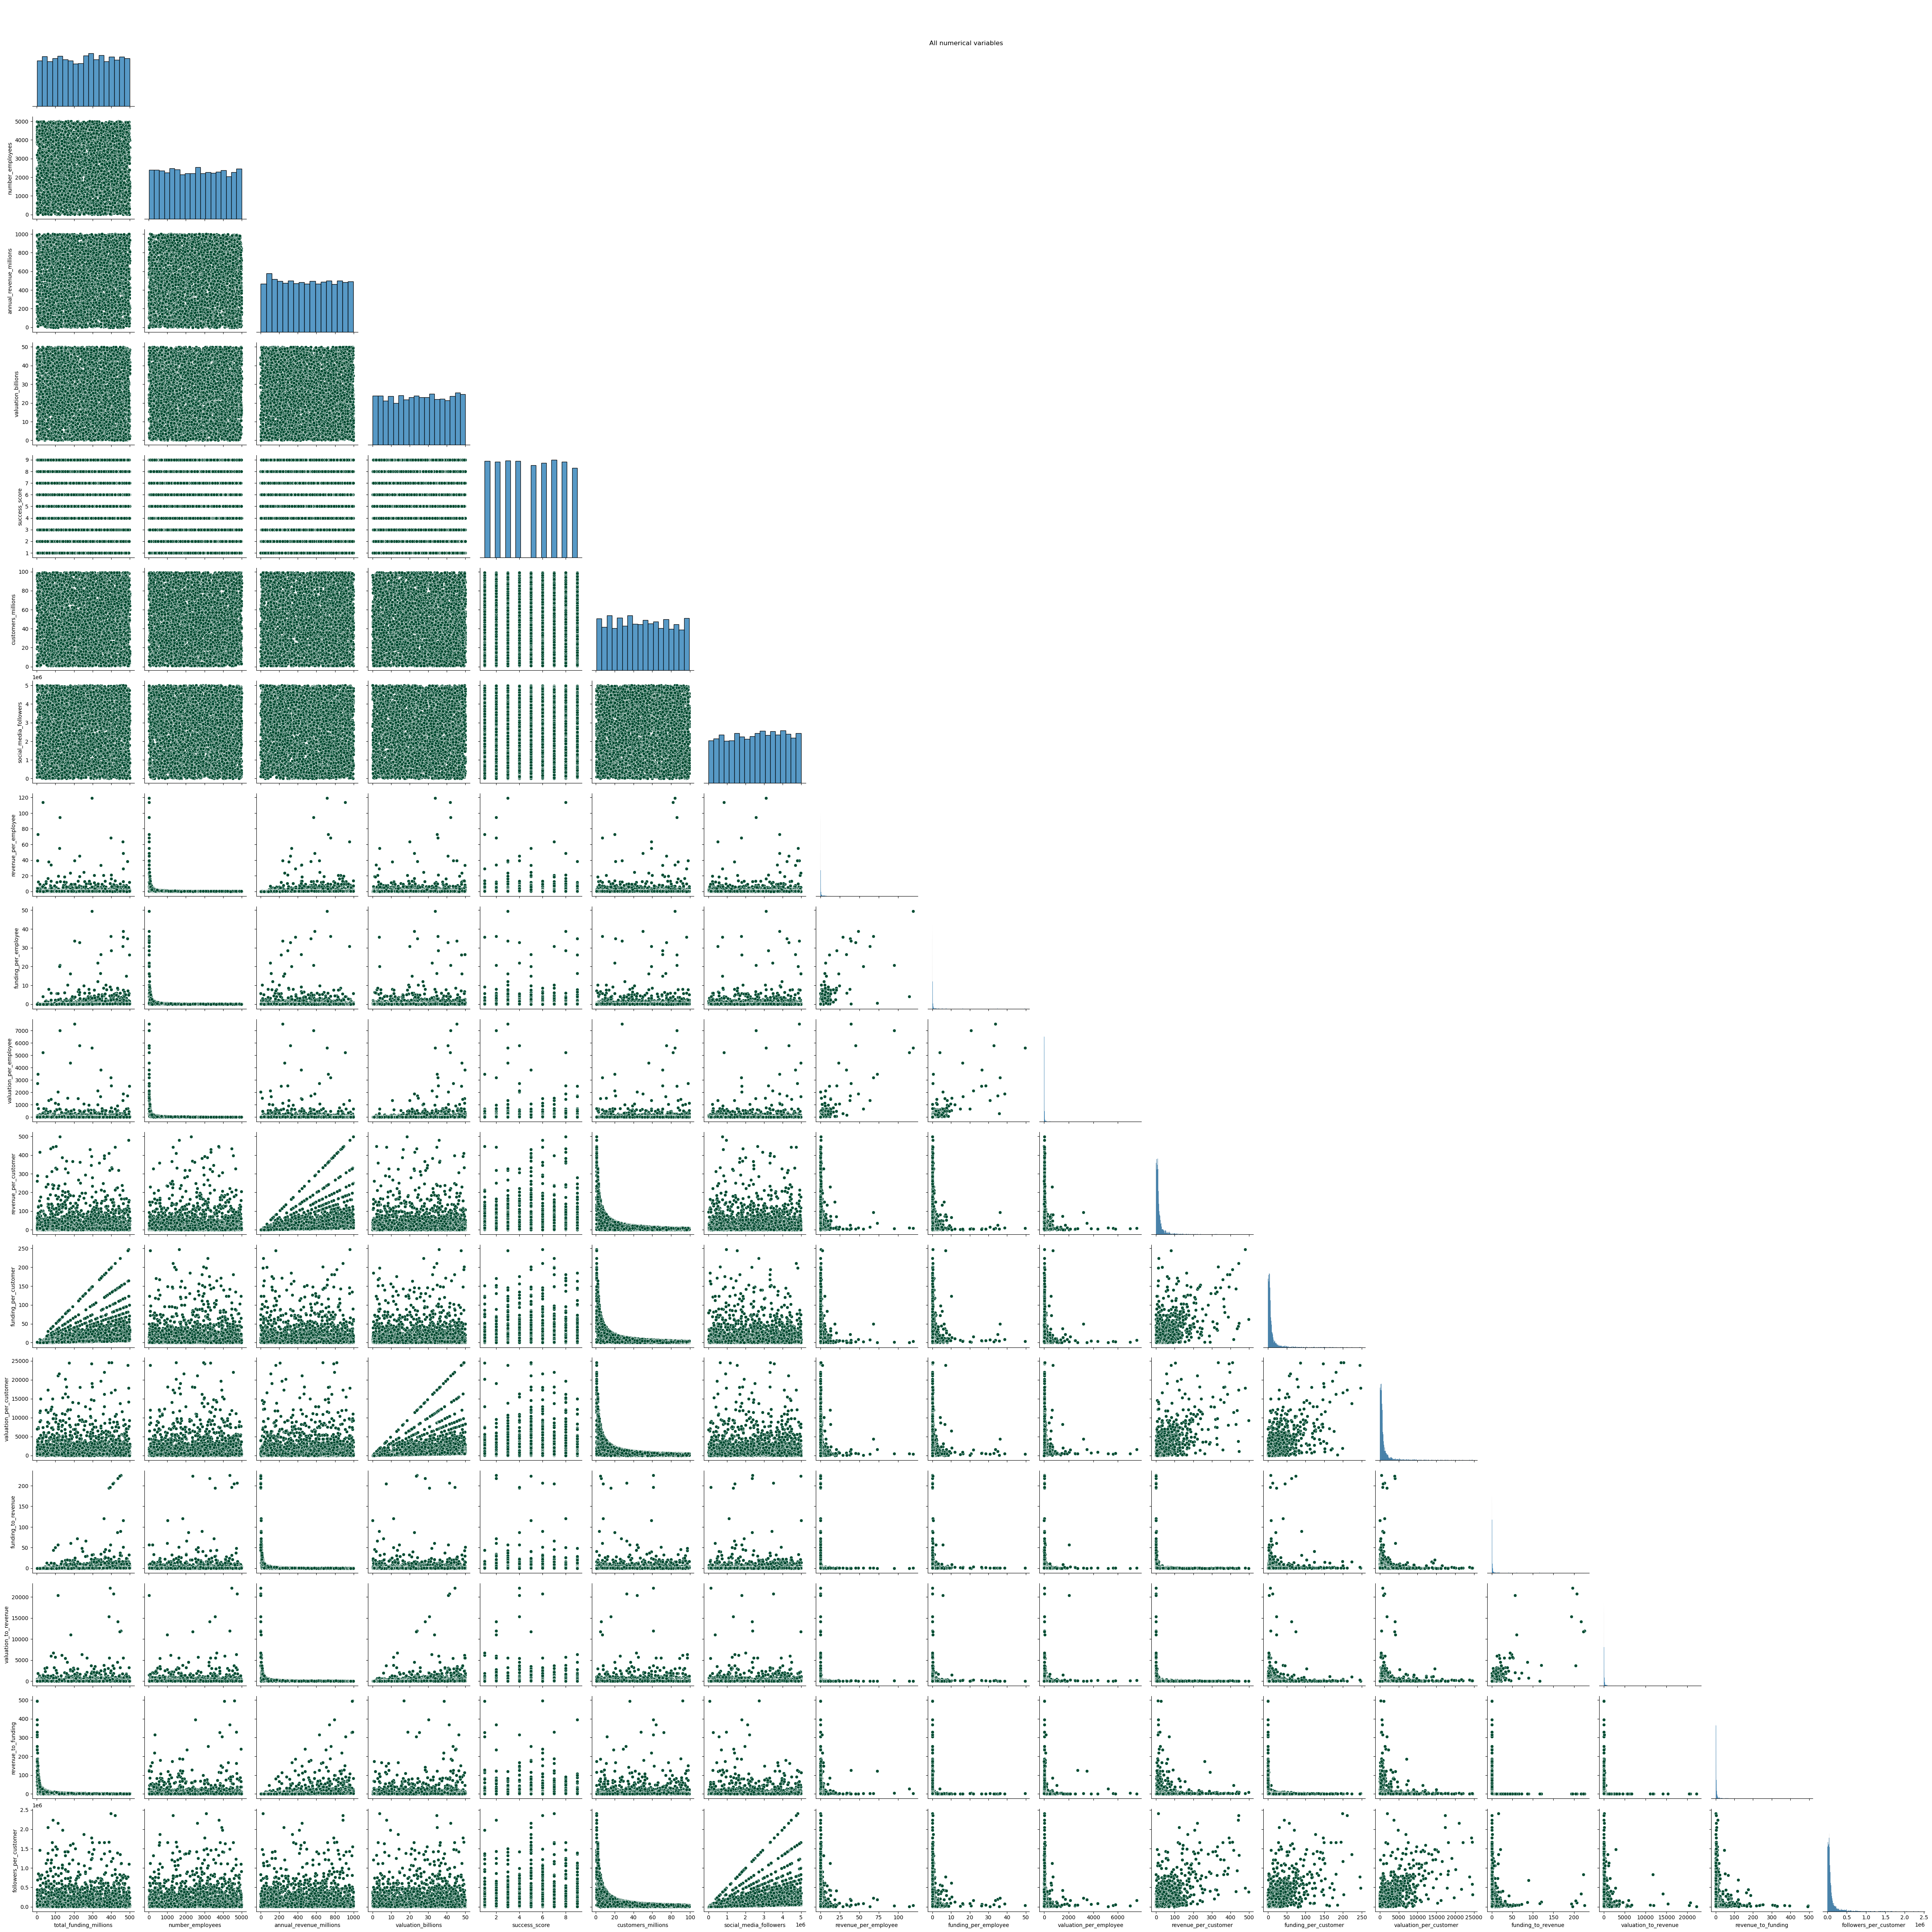

In [275]:
# Pair plot visualization w/ all numerical values

sns.pairplot(
    numerical_columns_global_startup_dataframe,
    corner=True,
    plot_kws={'color': '#004b31'},
    height=3
)
plt.suptitle("All numerical variables", y=0.97)
plt.show()

# Testing hypothesis 

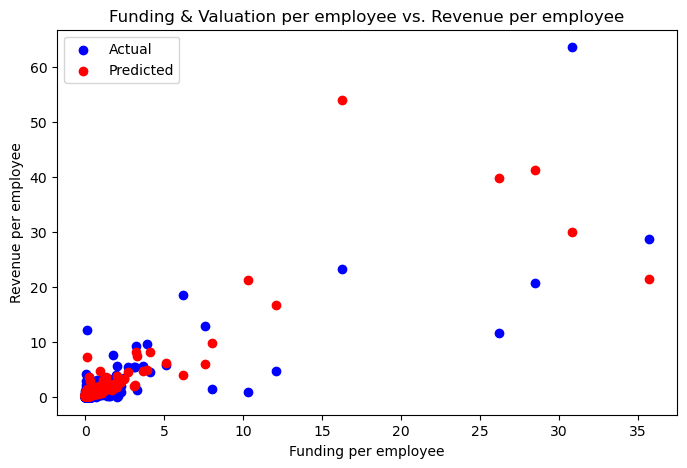

In [276]:
# Hypothesis 1: Startup's revenue per employee can be linearly predicted by its funding per employee and its valuation per employee. 

X_emp = global_startup_cleaned[['funding_per_employee', 'valuation_per_employee']].values
y_emp = global_startup_cleaned['revenue_per_employee'].values.reshape(-1,1)

X_train_emp, X_test_emp, y_train_emp, y_test_emp = train_test_split(X_emp, y_emp, test_size=0.2, random_state=42)

regression_emp = LinearRegression()
regression_emp.fit(X_train_emp, y_train_emp)

y_pred_emp = regression_emp.predict(X_test_emp)

plt.figure(figsize=(8,5))
plt.scatter(X_test_emp[:,0], y_test_emp, color='blue', label='Actual')
plt.scatter(X_test_emp[:,0], y_pred_emp, color='red', label='Predicted')
plt.xlabel('Funding per employee')
plt.ylabel('Revenue per employee')
plt.title('Funding & Valuation per employee vs. Revenue per employee')
plt.legend()
plt.show()

mse_emp = mean_squared_error(y_test_emp, y_pred_emp)
r2_emp = r2_score(y_test_emp, y_pred_emp)

comparison_emp = pd.DataFrame({
    'Actual revenue per employee': y_test_emp.flatten(),
    'Predicted revenue per employee': y_pred_emp.flatten()
})

In [277]:
mse_emp

4.584035954777914

In [278]:
r2_emp

0.3581093406464865

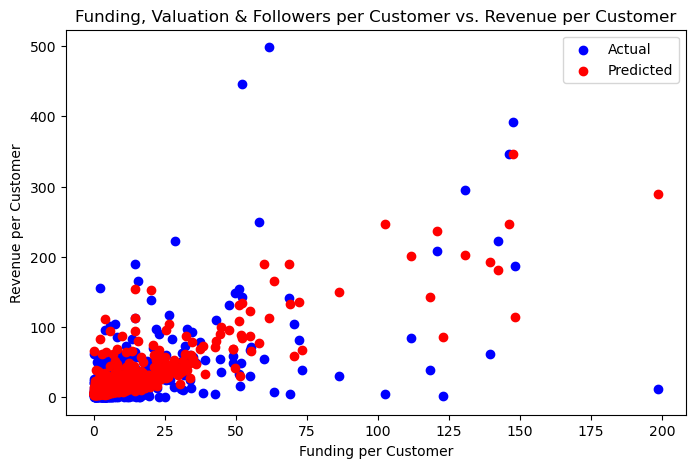

In [279]:
# Hypothesis 2: Startup's revenue per customer can be linearly predicted by its funding per customer, valuation per customer, and followers per customer.

X_cust = global_startup_cleaned[['funding_per_customer', 'valuation_per_customer', 'followers_per_customer']].values
y_cust = global_startup_cleaned['revenue_per_customer'].values.reshape(-1,1)

X_train_cust, X_test_cust, y_train_cust, y_test_cust = train_test_split(X_cust, y_cust, test_size=0.2, random_state=42)

regression_cust = LinearRegression()
regression_cust.fit(X_train_cust, y_train_cust)

y_pred_cust = regression_cust.predict(X_test_cust)

plt.figure(figsize=(8,5))
plt.scatter(X_test_cust[:,0], y_test_cust, color='blue', label='Actual')
plt.scatter(X_test_cust[:,0], y_pred_cust, color='red', label='Predicted')
plt.xlabel('Funding per Customer')
plt.ylabel('Revenue per Customer')
plt.title('Funding, Valuation & Followers per Customer vs. Revenue per Customer')
plt.legend()
plt.show()

mse_cust = mean_squared_error(y_test_cust, y_pred_cust)
r2_cust = r2_score(y_test_cust, y_pred_cust)

comparison_cust = pd.DataFrame({
    'Actual Revenue per Customer': y_test_cust.flatten(),
    'Predicted Revenue per Customer': y_pred_cust.flatten()
})


In [280]:
mse_cust

806.8114807201144

In [281]:
r2_cust

0.4239506910112062

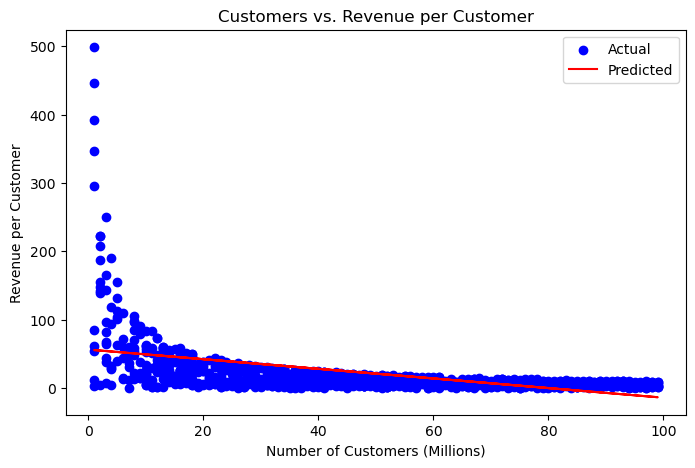

In [282]:
# Hypothesis 3: Startup's revenue per customer can be linearly predicted by its total number of customers.

X_custnum = global_startup_cleaned[['customers_millions']].values.reshape(-1,1)
y_custnum = global_startup_cleaned['revenue_per_customer'].values.reshape(-1,1)

X_train_custnum, X_test_custnum, y_train_custnum, y_test_custnum = train_test_split(X_custnum, y_custnum, test_size=0.2, random_state=42)

regression_custnum = LinearRegression()
regression_custnum.fit(X_train_custnum, y_train_custnum)

y_pred_custnum = regression_custnum.predict(X_test_custnum)

plt.figure(figsize=(8,5))
plt.scatter(X_test_custnum, y_test_custnum, color='blue', label='Actual')
plt.plot(X_test_custnum, y_pred_custnum, color='red', label='Predicted')
plt.xlabel('Number of Customers (Millions)')
plt.ylabel('Revenue per Customer')
plt.title('Customers vs. Revenue per Customer')
plt.legend()
plt.show()

mse_custnum = mean_squared_error(y_test_custnum, y_pred_custnum)
r2_custnum = r2_score(y_test_custnum, y_pred_custnum)

comparison_custnum = pd.DataFrame({
    'Actual revenue per customer': y_test_custnum.flatten(),
    'Predicted revenue per customer': y_pred_custnum.flatten()
})

In [283]:
mse_custnum

1127.309974939222

In [284]:
r2_custnum

0.19512036256560472

Classification Report - Acquisition:
               precision    recall  f1-score   support

           0       0.54      0.17      0.26       492
           1       0.52      0.86      0.64       508

    accuracy                           0.52      1000
   macro avg       0.53      0.51      0.45      1000
weighted avg       0.53      0.52      0.46      1000



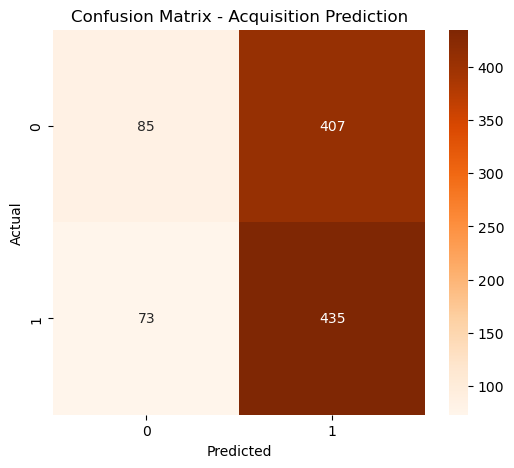

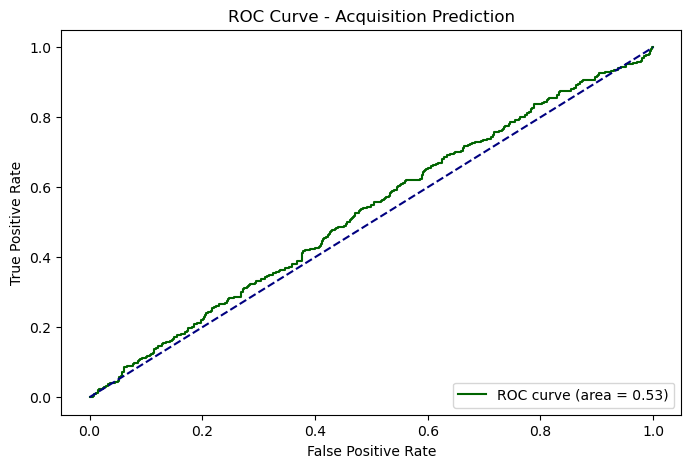

Coefficients for Acquisition Prediction:
                   Variable  Coefficient
0  annual_revenue_millions    -0.000039
1       customers_millions    -0.000817
2       funding_to_revenue    -0.001992


In [285]:
# Hypothesis 4: The likelihood of a startup being acquired can be predicted by its annual revenue, its total number of customers, and its funding-to-revenue ratio.

# Independent and dependent variables for acquisition
X_acq = global_startup_cleaned[['annual_revenue_millions', 'customers_millions', 'funding_to_revenue']]
y_acq = global_startup_cleaned['acquired']  # 0 = No, 1 = Yes

# Split into train/test sets
X_train_acq, X_test_acq, y_train_acq, y_test_acq = train_test_split(
    X_acq, y_acq, test_size=0.2, random_state=42
)

# Logistic regression model
logreg_acq = LogisticRegression(max_iter=1000)
logreg_acq.fit(X_train_acq, y_train_acq)

# Predictions and probabilities
y_pred_acq = logreg_acq.predict(X_test_acq)
y_pred_prob_acq = logreg_acq.predict_proba(X_test_acq)[:, 1]

# Model evaluation
print("Classification Report - Acquisition:\n", classification_report(y_test_acq, y_pred_acq))

# Confusion matrix
cm_acq = confusion_matrix(y_test_acq, y_pred_acq)
plt.figure(figsize=(6,5))
sns.heatmap(cm_acq, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Acquisition Prediction')
plt.show()

# ROC curve
fpr_acq, tpr_acq, thresholds_acq = roc_curve(y_test_acq, y_pred_prob_acq)
roc_auc_acq = auc(fpr_acq, tpr_acq)

plt.figure(figsize=(8,5))
plt.plot(fpr_acq, tpr_acq, color='darkgreen', label='ROC curve (area = %0.2f)' % roc_auc_acq)
plt.plot([0,1], [0,1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Acquisition Prediction')
plt.legend(loc="lower right")
plt.show()

# Model coefficients
coefficients_acq = pd.DataFrame({
    'Variable': X_acq.columns,
    'Coefficient': logreg_acq.coef_[0]
})
print("Coefficients for Acquisition Prediction:\n", coefficients_acq)

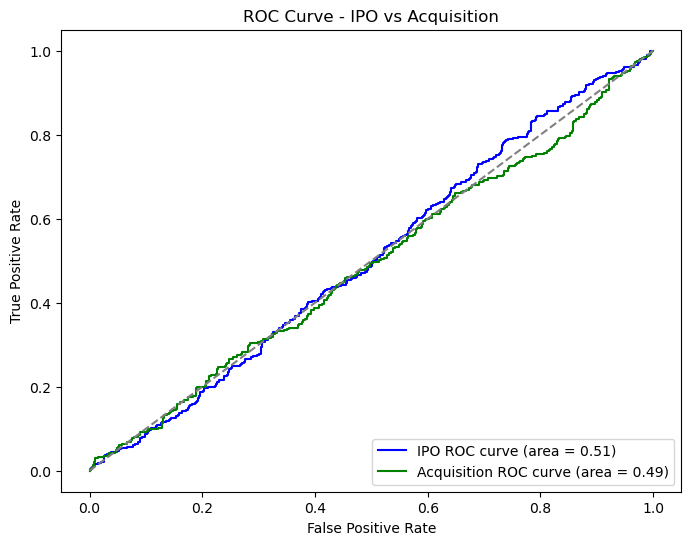

                  Variable  Coefficient_IPO  Coefficient_Acquisition
0   total_funding_millions         0.003873                 0.017763
1       valuation_billions        -0.022078                 0.011423
2            success_score         0.022496                 0.033823
3  annual_revenue_millions        -0.023276                -0.011736
4       customers_millions         0.006823                -0.022266
5       funding_to_revenue        -0.009905                -0.020340


In [286]:
# Hypothesis 5: A set of financial and performance metrics can predict a startup's exit strategy, IPO or acquisition. 

# Select predictors
predictors = ['total_funding_millions', 'valuation_billions', 'success_score',
              'annual_revenue_millions', 'customers_millions', 'funding_to_revenue']

X = global_startup_cleaned[predictors]

# Scale variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# IPO Target
y_ipo = global_startup_cleaned['ipo']
X_train_ipo, X_test_ipo, y_train_ipo, y_test_ipo = train_test_split(X_scaled, y_ipo, test_size=0.2, random_state=42)

logreg_ipo = LogisticRegression(max_iter=1000)
logreg_ipo.fit(X_train_ipo, y_train_ipo)
y_pred_prob_ipo = logreg_ipo.predict_proba(X_test_ipo)[:,1]

# Acquisition Target
y_acq = global_startup_cleaned['acquired']
X_train_acq, X_test_acq, y_train_acq, y_test_acq = train_test_split(X_scaled, y_acq, test_size=0.2, random_state=42)

logreg_acq = LogisticRegression(max_iter=1000)
logreg_acq.fit(X_train_acq, y_train_acq)
y_pred_prob_acq = logreg_acq.predict_proba(X_test_acq)[:,1]

# Comparative ROC Curve
fpr_ipo, tpr_ipo, _ = roc_curve(y_test_ipo, y_pred_prob_ipo)
roc_auc_ipo = auc(fpr_ipo, tpr_ipo)

fpr_acq, tpr_acq, _ = roc_curve(y_test_acq, y_pred_prob_acq)
roc_auc_acq = auc(fpr_acq, tpr_acq)

plt.figure(figsize=(8,6))
plt.plot(fpr_ipo, tpr_ipo, color='blue', label='IPO ROC curve (area = %0.2f)' % roc_auc_ipo)
plt.plot(fpr_acq, tpr_acq, color='green', label='Acquisition ROC curve (area = %0.2f)' % roc_auc_acq)
plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - IPO vs Acquisition')
plt.legend(loc='lower right')
plt.show()

# Comparative Coefficients
coeff_ipo = pd.DataFrame({'Variable': predictors, 'Coefficient_IPO': logreg_ipo.coef_[0]})
coeff_acq = pd.DataFrame({'Variable': predictors, 'Coefficient_Acquisition': logreg_acq.coef_[0]})

coeff_comparison = pd.merge(coeff_ipo, coeff_acq, on='Variable')
print(coeff_comparison)

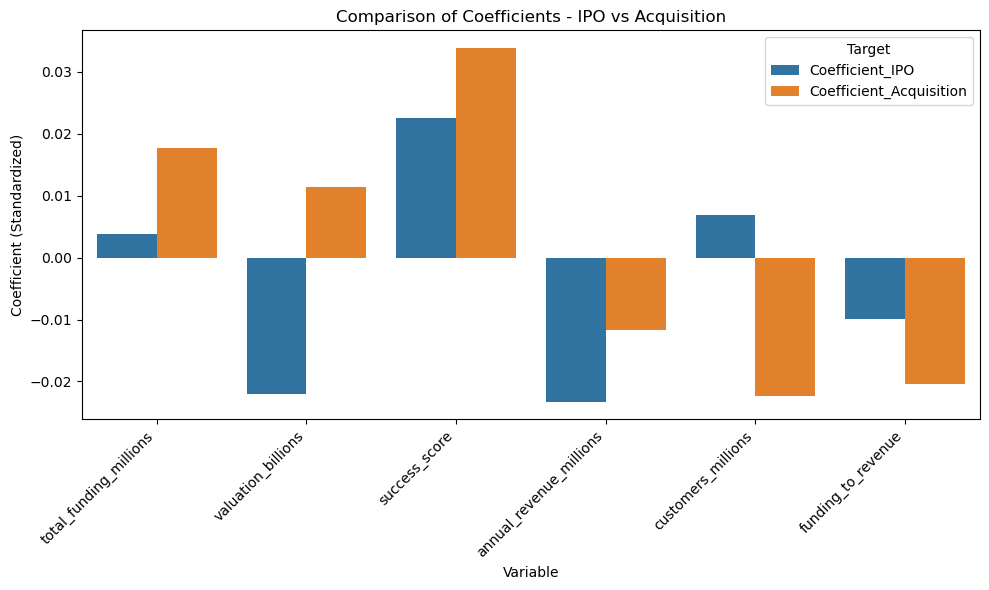

In [287]:
# Comparing the standardized coefficients of each predictor

coeff_melted = coeff_comparison.melt(id_vars='Variable', 
                                     value_vars=['Coefficient_IPO', 'Coefficient_Acquisition'], 
                                     var_name='Target', value_name='Coefficient')

plt.figure(figsize=(10,6))
sns.barplot(data=coeff_melted, x='Variable', y='Coefficient', hue='Target')
plt.xticks(rotation=45, ha='right')
plt.title('Comparison of Coefficients - IPO vs Acquisition')
plt.ylabel('Coefficient (Standardized)')
plt.xlabel('Variable')
plt.legend(title='Target')
plt.tight_layout()
plt.show()

=== Acquisition Model ===
              precision    recall  f1-score   support

           0       0.47      0.30      0.36       492
           1       0.50      0.68      0.57       508

    accuracy                           0.49      1000
   macro avg       0.48      0.49      0.47      1000
weighted avg       0.48      0.49      0.47      1000



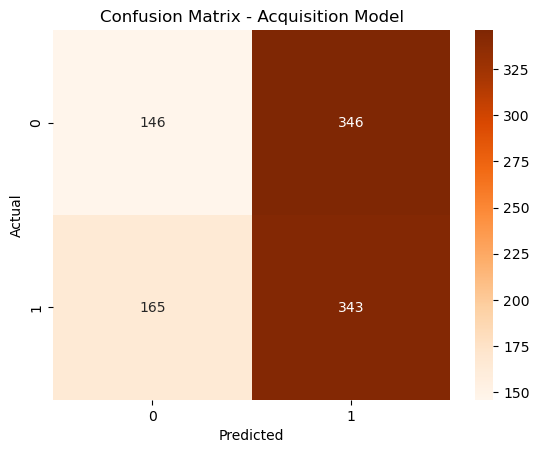

               Variable  Coefficient_Acquisition
0  revenue_per_customer                 0.035687
1  funding_per_customer                 0.055027
2    customers_millions                 0.022771


In [288]:
# Hypothesis 6: Startup's likelihood of being acquired can be predicted by its revenue per customer, funding per customer, and total number of customers.

# Probability of Acquisition

X_acq2 = global_startup_cleaned[['revenue_per_customer', 'funding_per_customer', 'customers_millions']]
y_acq2 = global_startup_cleaned['acquired']

# Scaling
scaler_acq2 = StandardScaler()
X_acq2_scaled = scaler_acq2.fit_transform(X_acq2)

# Train/test split
X_train_acq2, X_test_acq2, y_train_acq2, y_test_acq2 = train_test_split(X_acq2_scaled, y_acq2, test_size=0.2, random_state=42)

# Model
logreg_acq2 = LogisticRegression(max_iter=1000)
logreg_acq2.fit(X_train_acq2, y_train_acq2)
y_pred_prob_acq2 = logreg_acq2.predict_proba(X_test_acq2)[:,1]

# Evaluation
print("=== Acquisition Model ===")
print(classification_report(y_test_acq2, logreg_acq2.predict(X_test_acq2)))

# Confusion matrix
cm_acq2 = confusion_matrix(y_test_acq2, logreg_acq2.predict(X_test_acq2))
sns.heatmap(cm_acq2, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - Acquisition Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Coefficients
coeff_acq2 = pd.DataFrame({
    'Variable': X_acq2.columns,
    'Coefficient_Acquisition': logreg_acq2.coef_[0]
})
print(coeff_acq2)

=== IPO Model ===
              precision    recall  f1-score   support

           0       0.52      0.98      0.68       521
           1       0.31      0.01      0.02       479

    accuracy                           0.52      1000
   macro avg       0.41      0.50      0.35      1000
weighted avg       0.42      0.52      0.36      1000



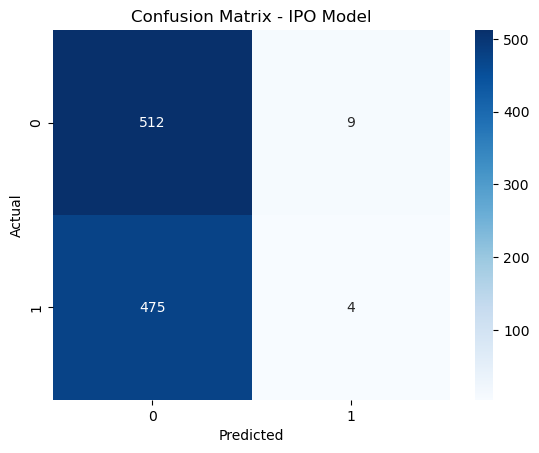

             Variable  Coefficient_IPO
0  revenue_to_funding         0.023598
1  funding_to_revenue        -0.003741


In [289]:
# Hypothesis 7: Startup's likelihood of going IPO can be predicted by its financial efficiency ratios, specifically the relationship between its revenue and the total funding it has received.

# Probability of IPO

X_ipo2 = global_startup_cleaned[['revenue_to_funding', 'funding_to_revenue']]
y_ipo2 = global_startup_cleaned['ipo']

# Scaling
scaler_ipo2 = StandardScaler()
X_ipo2_scaled = scaler_ipo2.fit_transform(X_ipo2)

# Train/test split
X_train_ipo2, X_test_ipo2, y_train_ipo2, y_test_ipo2 = train_test_split(X_ipo2_scaled, y_ipo2, test_size=0.2, random_state=42)

# Model
logreg_ipo2 = LogisticRegression(max_iter=1000)
logreg_ipo2.fit(X_train_ipo2, y_train_ipo2)
y_pred_prob_ipo2 = logreg_ipo2.predict_proba(X_test_ipo2)[:,1]

# Evaluation
print("=== IPO Model ===")
print(classification_report(y_test_ipo2, logreg_ipo2.predict(X_test_ipo2)))

# Confusion matrix
cm_ipo2 = confusion_matrix(y_test_ipo2, logreg_ipo2.predict(X_test_ipo2))
sns.heatmap(cm_ipo2, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - IPO Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Coefficients
coeff_ipo2 = pd.DataFrame({
    'Variable': X_ipo2.columns,
    'Coefficient_IPO': logreg_ipo2.coef_[0]
})
print(coeff_ipo2)

# Clustering data

In [290]:
numerical_columns_global_startup_dataframe.head()

total_funding_millions  number_employees  annual_revenue_millions  \
0                   269.0            3047.0                    104.0   
1                    40.0             630.0                    431.0   
2                   399.0            2475.0                    375.0   
3                   404.0            1011.0                    907.0   
4                   419.0            3917.0                    280.0   

   valuation_billions  success_score  customers_millions  \
0               46.11            5.0                43.0   
1               33.04            1.0                64.0   
2               15.79            8.0                74.0   
3               17.12            7.0                26.0   
4                4.39            6.0                30.0   

   social_media_followers  revenue_per_employee  funding_per_employee  \
0               4158814.0              0.034121              0.088255   
1               4063014.0              0.683043              0.063391   
2               3449855.0              0.151454              0.161147   
3                630421.0              0.896245              0.399209   
4                365956.0              0.071465              0.106942   

   valuation_per_employee  revenue_per_customer  funding_per_customer  \
0               15.127953              2.363636              6.113636   
1               52.361331              6.630769              0.615385   
2                6.377221              5.000000              5.320000   
3               16.916996             33.592593             14.962963   
4                1.120470              9.032258             13.516129   

   valuation_per_customer  funding_to_revenue  valuation_to_revenue  \
0             1047.954545            2.561905            439.142857   
1              508.307692            0.092593             76.481481   
2              210.533333            1.061170             41.994681   
3              634.074074            0.444934             18.854626   
4              141.612903            1.491103             15.622776   

   revenue_to_funding  followers_per_customer  
0            0.385185            94518.500000  
1           10.512195            62507.907692  
2            0.937500            45998.066667  
3            2.239506            23348.925926  
4            0.666667            11805.032258

In [291]:
# Standardizing the data

scaler = StandardScaler()
startup_data_scaled = scaler.fit_transform(numerical_columns_global_startup_dataframe)

In [292]:
startup_data_scaled

array([[ 1.22232932e-01,  3.87477959e-01, -1.35056628e+00, ...,
         3.62695283e-01, -2.56162790e-01, -6.30202448e-02],
       [-1.46903407e+00, -1.27771689e+00, -2.23145240e-01, ...,
        -1.13973799e-01,  2.22184175e-01, -2.28975468e-01],
       [ 1.02557228e+00, -6.60208078e-03, -4.16220403e-01, ...,
        -1.59302010e-01, -2.30074328e-01, -3.14568834e-01],
       ...,
       [ 5.87800133e-01,  2.87430407e-04, -7.95475186e-01, ...,
        -1.49916587e-01, -2.37213856e-01, -3.01326101e-01],
       [-1.51072666e+00, -5.17114859e-01, -1.58846246e+00, ...,
         1.48760316e+00, -2.27122155e-01, -2.56087889e-01],
       [ 1.98669338e-01,  3.03425922e-01,  3.19897962e-02, ...,
        -2.12264411e-01, -1.89468817e-01, -4.98970377e-01]])

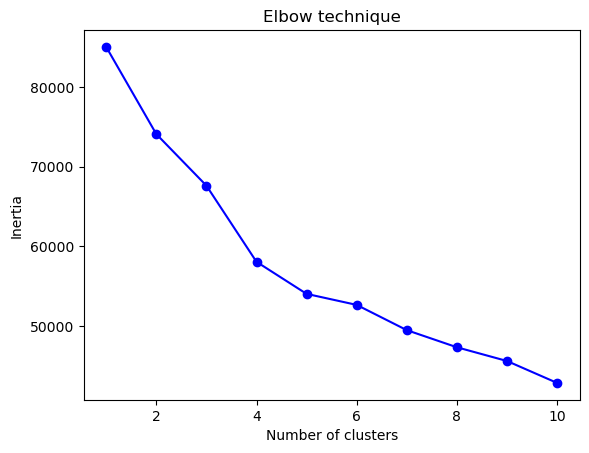

In [293]:
# Using Elbow Technique to determine the optimal number of clusters

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(startup_data_scaled)
    inertia.append(kmeans.inertia_)
    
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow technique')
plt.show()

In [294]:
# Run k-means with Chosen k

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(startup_data_scaled)

In [295]:
KMeans(n_clusters=5)

KMeans(n_clusters=5)

In [296]:
# Add clusters column to original dataframe

global_startup_cleaned['cluster'] = clusters

In [297]:
global_startup_cleaned.head()

startup_name founded_year country    industry funding_stage  \
0    Startup_1   2009-01-01  Canada  Healthcare      Series A   
1    Startup_2   2004-01-01      UK  Healthcare           IPO   
2    Startup_3   2018-01-01     USA  Healthcare          Seed   
3    Startup_4   2014-01-01  France        Tech          Seed   
4    Startup_5   2006-01-01   Japan      Energy      Series C   

   total_funding_millions  number_employees  annual_revenue_millions  \
0                   269.0            3047.0                    104.0   
1                    40.0             630.0                    431.0   
2                   399.0            2475.0                    375.0   
3                   404.0            1011.0                    907.0   
4                   419.0            3917.0                    280.0   

   valuation_billions  success_score  ... funding_per_employee  \
0               46.11            5.0  ...             0.088255   
1               33.04            1.0  ...             0.063391   
2               15.79            8.0  ...             0.161147   
3               17.12            7.0  ...             0.399209   
4                4.39            6.0  ...             0.106942   

  valuation_per_employee  revenue_per_customer funding_per_customer  \
0              15.127953              2.363636             6.113636   
1              52.361331              6.630769             0.615385   
2               6.377221              5.000000             5.320000   
3              16.916996             33.592593            14.962963   
4               1.120470              9.032258            13.516129   

   valuation_per_customer funding_to_revenue valuation_to_revenue  \
0             1047.954545           2.561905           439.142857   
1              508.307692           0.092593            76.481481   
2              210.533333           1.061170            41.994681   
3              634.074074           0.444934            18.854626   
4              141.612903           1.491103            15.622776   

  revenue_to_funding followers_per_customer cluster  
0           0.385185           94518.500000       4  
1          10.512195           62507.907692       1  
2           0.937500           45998.066667       1  
3           2.239506           23348.925926       4  
4           0.666667           11805.032258       4  

[5 rows x 33 columns]

In [298]:
# Checking clusters results

cluster_summary = global_startup_cleaned.groupby('cluster')[numerical_columns_global_startup_dataframe.columns].mean()

In [299]:
cluster_summary

total_funding_millions  number_employees  annual_revenue_millions  \
cluster                                                                      
0                    272.442857       2580.990476               564.561905   
1                    239.816585       2501.000000               496.080815   
2                    358.888889       3155.333333                 1.111111   
3                    296.294118          9.941176               489.000000   
4                    265.406152       2468.453076               490.031804   

         valuation_billions  success_score  customers_millions  \
cluster                                                          
0                 28.341667       5.223810            3.042857   
1                 24.790808       4.784610           69.680604   
2                 30.370000       4.000000           26.777778   
3                 32.958824       4.823529           57.117647   
4                 25.467362       5.210115           24.166840   

         social_media_followers  revenue_per_employee  funding_per_employee  \
cluster                                                                       
0                  2.726161e+06              0.576242              0.345390   
1                  2.439581e+06              0.544358              0.258837   
2                  2.024993e+06              0.005991              0.736819   
3                  3.157423e+06             51.995863             26.883929   
4                  2.719581e+06              0.575893              0.312684   

         valuation_per_employee  revenue_per_customer  funding_per_customer  \
cluster                                                                       
0                     37.250008            159.294599             76.870663   
1                     27.553552              7.523465              3.521311   
2                    236.004590              0.090372             28.418360   
3                   3475.776041             14.700239              8.582434   
4                     29.999036             25.605631             13.712411   

         valuation_per_customer  funding_to_revenue  valuation_to_revenue  \
cluster                                                                     
0                   7971.389380            1.257703            118.684661   
1                    373.421086            1.356859            139.033292   
2                   1995.236857          176.074074          14570.185185   
3                    917.672049            0.874911             97.396789   
4                   1325.626592            1.564796            136.901769   

         revenue_to_funding  followers_per_customer  
cluster                                              
0                  5.438985           759874.334004  
1                  6.904057            36120.271987  
2                  0.004045           181060.952955  
3                 10.151769            85540.740495  
4                  4.211727           139684.963517

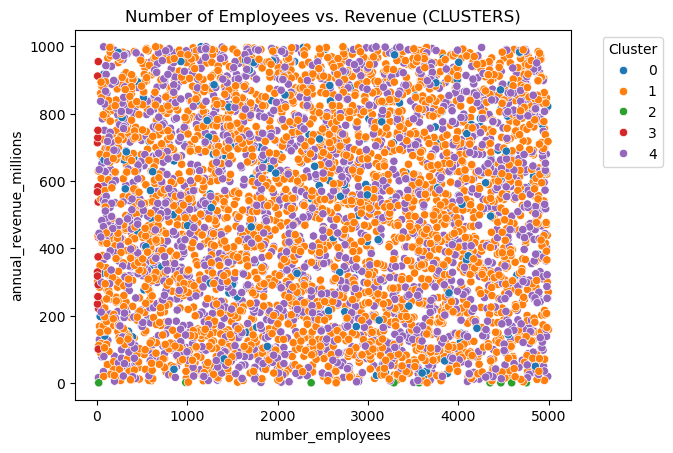

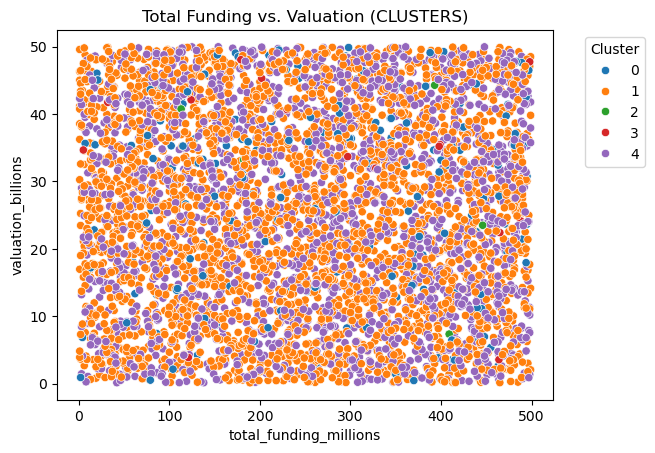

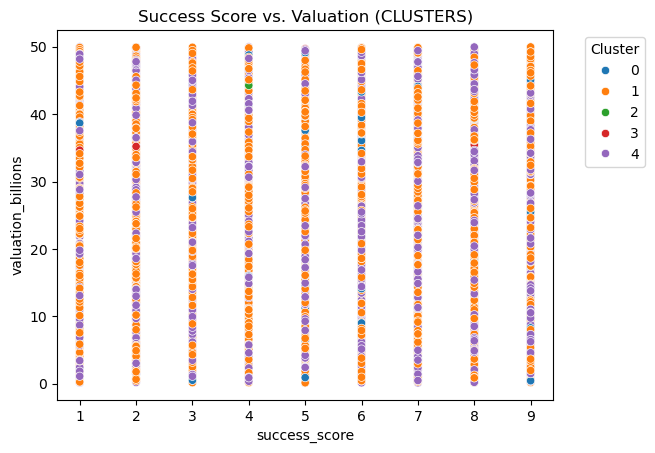

In [300]:
# Visualizing clusters

# Defining palette of colours for the diff. clusters

cluster_colors = {
    0: "#1f77b4",  
    1: "#ff7f0e",  
    2: "#2ca02c",  
    3: "#d62728",  
    4: "#9467bd"  
}

# Creating scatterplot showing Number of employees vs. Annual Revenue

sns.scatterplot(
    x='number_employees',
    y='annual_revenue_millions',
    hue='cluster',
    data=global_startup_cleaned,
    palette=cluster_colors
)
plt.title("Number of Employees vs. Revenue (CLUSTERS)")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Creating scatterplot showing Total funding vs. Valuation

sns.scatterplot(
    x='total_funding_millions',
    y='valuation_billions',
    hue='cluster',
    data=global_startup_cleaned,
    palette=cluster_colors
)
plt.title("Total Funding vs. Valuation (CLUSTERS)")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Creating scatterplot showing Success Score vs. Valuation

sns.scatterplot(
    x='success_score',
    y='valuation_billions',
    hue='cluster',
    data=global_startup_cleaned,
    palette=cluster_colors
)
plt.title("Success Score vs. Valuation (CLUSTERS)")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Exploring ratios

In [301]:
# Selecting ratios to analyze

ratio_cols = [
    "revenue_per_employee", "funding_per_employee", "valuation_per_employee",
    "revenue_per_customer", "funding_per_customer", "valuation_per_customer",
    "funding_to_revenue", "valuation_to_revenue", "followers_per_customer",
    "revenue_to_funding"
]

X = global_startup_cleaned[ratio_cols].copy()

scaler = StandardScaler()
X_scaled_ratio = scaler.fit_transform(X)  # nombre distinto para no sobreescribir

pca_ratio = PCA(n_components=2, random_state=42)
X_pca_ratio = pca_ratio.fit_transform(X_scaled_ratio)

global_startup_cleaned["ratio_pca1_new"] = X_pca_ratio[:,0]
global_startup_cleaned["ratio_pca2_new"] = X_pca_ratio[:,1]

kmeans_ratio = KMeans(n_clusters=5, random_state=42, n_init=10)
global_startup_cleaned["ratio_cluster_new"] = kmeans_ratio.fit_predict(X_scaled_ratio)

In [302]:
# Avg Success Score by cluster
print(global_startup_cleaned.groupby("ratio_cluster_new")["success_score"].mean())

# Acquired startups by cluster
print(global_startup_cleaned.groupby("ratio_cluster_new")["acquired"].value_counts(normalize=True).unstack())

# IPO proportion by cluster
print(global_startup_cleaned.groupby("ratio_cluster_new")["ipo"].value_counts(normalize=True).unstack())

ratio_cluster_new
0    4.444444
1    4.958528
2    4.000000
3    5.220339
4    4.823529
Name: success_score, dtype: float64
acquired                  0         1
ratio_cluster_new                    
0                  0.555556  0.444444
1                  0.494683  0.505317
2                  0.444444  0.555556
3                  0.457627  0.542373
4                  0.529412  0.470588
ipo                       0         1
ratio_cluster_new                    
0                  0.500000  0.500000
1                  0.519353  0.480647
2                  0.555556  0.444444
3                  0.546610  0.453390
4                  0.647059  0.352941


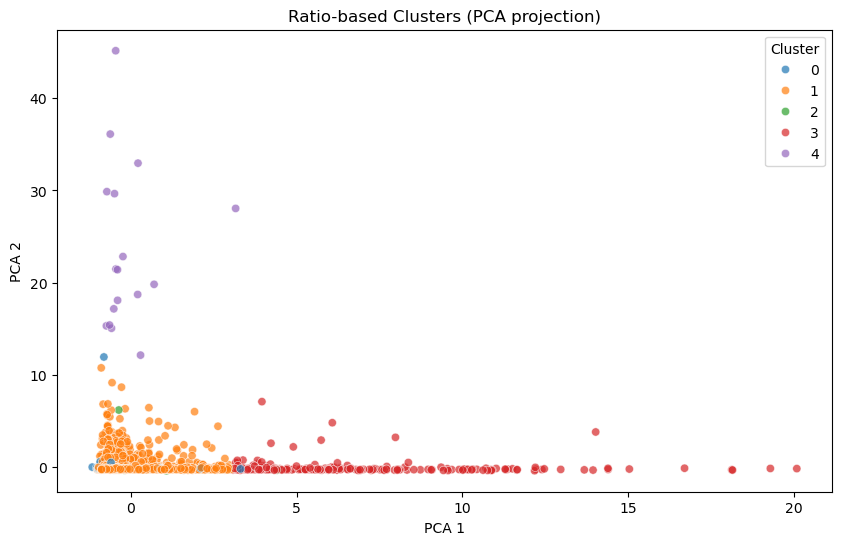

In [303]:
# Visualizing clusters

cluster_colors = {
    0: "#1f77b4",  
    1: "#ff7f0e",  
    2: "#2ca02c",  
    3: "#d62728",  
    4: "#9467bd",  
    5: "#8c564b" 
}

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=global_startup_cleaned,
    x="ratio_pca1_new",
    y="ratio_pca2_new",
    hue="ratio_cluster_new",
    palette=cluster_colors,
    alpha=0.7
)
plt.title("Ratio-based Clusters (PCA projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()

# Preparing dataset for Tableau

In [304]:
global_startup_cleaned.shape

(5000, 36)

In [305]:
global_startup_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   startup_name             5000 non-null   object        
 1   founded_year             5000 non-null   datetime64[ns]
 2   country                  5000 non-null   category      
 3   industry                 5000 non-null   category      
 4   funding_stage            5000 non-null   category      
 5   total_funding_millions   5000 non-null   float64       
 6   number_employees         5000 non-null   float64       
 7   annual_revenue_millions  5000 non-null   float64       
 8   valuation_billions       5000 non-null   float64       
 9   success_score            5000 non-null   float64       
 10  acquired                 5000 non-null   category      
 11  ipo                      5000 non-null   category      
 12  customers_millions       5000 non-

In [306]:
global_startup_cleaned.head()

startup_name founded_year country    industry funding_stage  \
0    Startup_1   2009-01-01  Canada  Healthcare      Series A   
1    Startup_2   2004-01-01      UK  Healthcare           IPO   
2    Startup_3   2018-01-01     USA  Healthcare          Seed   
3    Startup_4   2014-01-01  France        Tech          Seed   
4    Startup_5   2006-01-01   Japan      Energy      Series C   

   total_funding_millions  number_employees  annual_revenue_millions  \
0                   269.0            3047.0                    104.0   
1                    40.0             630.0                    431.0   
2                   399.0            2475.0                    375.0   
3                   404.0            1011.0                    907.0   
4                   419.0            3917.0                    280.0   

   valuation_billions  success_score  ... funding_per_customer  \
0               46.11            5.0  ...             6.113636   
1               33.04            1.0  ...             0.615385   
2               15.79            8.0  ...             5.320000   
3               17.12            7.0  ...            14.962963   
4                4.39            6.0  ...            13.516129   

  valuation_per_customer  funding_to_revenue valuation_to_revenue  \
0            1047.954545            2.561905           439.142857   
1             508.307692            0.092593            76.481481   
2             210.533333            1.061170            41.994681   
3             634.074074            0.444934            18.854626   
4             141.612903            1.491103            15.622776   

   revenue_to_funding followers_per_customer cluster ratio_pca1_new  \
0            0.385185           94518.500000       4      -0.367341   
1           10.512195           62507.907692       1      -0.684349   
2            0.937500           45998.066667       1      -0.696674   
3            2.239506           23348.925926       4      -0.058588   
4            0.666667           11805.032258       4      -0.548703   

  ratio_pca2_new ratio_cluster_new  
0      -0.248499                 1  
1      -0.069202                 1  
2      -0.229859                 1  
3      -0.023502                 1  
4      -0.269212                 1  

[5 rows x 36 columns]

In [307]:
global_startup_cleaned.describe()

founded_year  total_funding_millions  number_employees  \
count                        5000             5000.000000       5000.000000   
mean   2010-12-17 15:51:33.120000              251.409400       2484.582800   
min           2000-01-01 00:00:00                1.000000          5.000000   
25%           2005-01-01 00:00:00              125.750000       1233.750000   
50%           2011-01-01 00:00:00              255.000000       2493.000000   
75%           2017-01-01 00:00:00              376.000000       3730.500000   
max           2022-01-01 00:00:00              499.000000       4998.000000   
std                           NaN              143.924874       1451.626957   

       annual_revenue_millions  valuation_billions  success_score  \
count              5000.000000         5000.000000    5000.000000   
mean                495.721600           25.237284       4.965000   
min                   1.000000            0.110000       1.000000   
25%                 240.750000           12.845000       3.000000   
50%                 496.000000           25.460000       5.000000   
75%                 746.000000           37.650000       7.000000   
max                 999.000000           49.980000       9.000000   
std                 290.071494           14.509278       2.574316   

       customers_millions  social_media_followers  revenue_per_employee  \
count         5000.000000            5.000000e+03           5000.000000   
mean            49.302800            2.560720e+06              0.731760   
min              1.000000            1.005000e+03              0.000210   
25%             25.000000            1.353902e+06              0.096930   
50%             49.000000            2.618292e+06              0.198232   
75%             74.000000            3.802054e+06              0.409588   
max             99.000000            4.999860e+06            119.000000   
std             28.364894            1.430807e+06              3.906798   

       funding_per_employee  ...  funding_per_customer  \
count           5000.000000  ...           5000.000000   
mean               0.374513  ...             10.573312   
min                0.000201  ...              0.010417   
25%                0.050458  ...              2.551818   
50%                0.101261  ...              4.936973   
75%                0.206731  ...              9.566770   
max               49.500000  ...            247.000000   
std                1.882853  ...             19.896931   

       valuation_per_customer  funding_to_revenue  valuation_to_revenue  \
count             5000.000000         5000.000000           5000.000000   
mean              1062.571508            1.745311            163.195507   
min                  1.443299            0.001008              0.150451   
25%                255.292204            0.254170             25.709802   
50%                495.971978            0.502359             49.501866   
75%                969.402941            0.997282            102.301242   
max              24625.000000          225.500000          22135.000000   
std               2023.542456            9.176262            760.900300   

       revenue_to_funding  followers_per_customer      cluster  \
count         5000.000000            5.000000e+03  5000.000000   
mean             5.808368            1.066743e+05     2.117400   
min              0.002212            5.116456e+01     0.000000   
25%              0.994573            2.686511e+04     1.000000   
50%              1.974158            5.104102e+04     1.000000   
75%              3.891931            9.797192e+04     4.000000   
max            495.500000            2.403606e+06     4.000000   
std             21.172963            1.929062e+05     1.503885   

       ratio_pca1_new  ratio_pca2_new  ratio_cluster_new  
count    5.000000e+03    5.000000e+03         5000.00000  
mean    -4.547474e-17   -2.842171e-18            1.09920  
min     -1.166547e+00   -3.994295e-01   

In [308]:
# Sorting columns 

ordered_cols = [
    'startup_name', 'founded_year', 'country', 'continent',
    
    'industry', 'funding_stage', 'funding_stage_group', 
    'size_employees', 'size_revenue', 'size_funding', 'size_valuation', 
    'tech_stack',
    
    'total_funding_millions', 'number_employees', 'annual_revenue_millions', 
    'valuation_billions', 'customers_millions', 'social_media_followers',
    
    'revenue_per_employee', 'funding_per_employee', 'valuation_per_employee',
    'revenue_per_customer', 'funding_per_customer', 'valuation_per_customer',
    'funding_to_revenue', 'valuation_to_revenue', 'revenue_to_funding', 'followers_per_customer',
    
    'success_score', 'acquired', 'ipo',
    
    'cluster', 'ratio_cluster_new', 'ratio_pca1_new', 'ratio_pca2_new'
]

global_startup_tableau = global_startup_cleaned[ordered_cols].copy()

In [309]:
global_startup_tableau.to_csv(os.path.join(path, '02_data', 'prepared_data', 'global_startup_for_tableau.csv'), index=False,)